<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="ffffff">
vgg16 layers code

</font>
</h1>

pariya branch

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نصب کتابخانه های مورد نظر</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">خواندن داده از روی سیستم</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


In [15]:
train_data_dir = r'E:\projectDataset\tZoghi\db6\train'
test_data_dir = r'E:\projectDataset\tZoghi\db6\test'
val_data_dir =  r'E:\projectDataset\tZoghi\db6\val'

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">استفاده از dataGenerator</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


In [51]:
input_target = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_target,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_target,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size=input_target,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10901 images belonging to 6 classes.
Found 1452 images belonging to 6 classes.
Found 1246 images belonging to 6 classes.


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش تعدادی از داده های دیتاست</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


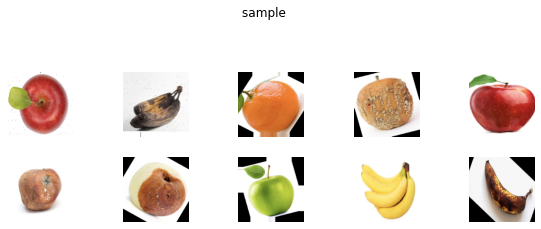

In [52]:
image_batch, label_batch = train_generator.next()

plt.figure(figsize=(10,9))
for n in range(10):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    plt.axis('off')
_ = plt.suptitle(" sample")

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش ۶ کلاس دیتاست به همراه شماره کلاس</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


In [53]:
print(train_generator.class_indices)
print(test_generator.class_indices)
print(val_generator.class_indices)


{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">استفاده از مدل اماده vgg16و</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# Load VGG16 pre-trained model
base_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

base_model.trainable = False

# Display the model summary
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [55]:
# build classification model on top of vgg16
model = Sequential()
model.add(base_model)
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(6, activation='softmax'))

# print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
Total params: 17,934,726
Trainable params: 3,220,038
Non-trainable params: 14,714,688
_________________________________________________________________


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">خلاصه ی مدل ایجاد شده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
Total params: 17,934,726
Trainable params: 3,220,038
Non-trainable params: 14,714,688
_________________________________________________________________


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی قابل آموزش بودن لایه های مدل</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>

In [57]:
for i, layer in enumerate(model.layers):
   print(i, layer.name, layer.trainable)

0 vgg16 False
1 flatten_2 True
2 dense_4 True
3 dense_5 True
4 dense_6 True


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کامپایل کردن مدل</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ساخت checkpoint و ealyStop</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


In [59]:
early_stopping = EarlyStopping(patience=30)

model_checkpoint = ModelCheckpoint(
    "../Checkpoints/my_checkpoint_vgg16", save_best_only=True)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموزش مدل</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


In [60]:
history = model.fit(
    train_generator,
    batch_size=32,
    epochs=199,
    validation_data=val_generator,
    callbacks=[early_stopping,model_checkpoint]
)

Epoch 1/199
341/341 [==============================] - 1836s 5s/step - loss: 0.6823 - accuracy: 0.7633 - val_loss: 0.1003 - val_accuracy: 0.9671
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_vgg16\assets
Epoch 2/199
341/341 [==============================] - 1787s 5s/step - loss: 0.1452 - accuracy: 0.9494 - val_loss: 0.0597 - val_accuracy: 0.9848
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_vgg16\assets
Epoch 3/199
341/341 [==============================] - 1739s 5s/step - loss: 0.0928 - accuracy: 0.9674 - val_loss: 0.0774 - val_accuracy: 0.9751
Epoch 4/199
341/341 [==============================] - 1737s 5s/step - loss: 0.0824 - accuracy: 0.9715 - val_loss: 0.0380 - val_accuracy: 0.9839
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_vgg16\assets
Epoch 5/199
341/341 [==============================] - 1750s 5s/step - loss: 0.0620 - accuracy: 0.9782 - val_loss: 0.0487 - val_accuracy: 0.9848
Epoch 6/199
341/341 [=======================

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی دقت مدل برای داده های آزمایشی</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


In [61]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

46/46 [==============================] - 203s 4s/step - loss: 0.0275 - accuracy: 0.9945
Test Loss: 0.027479922398924828
Test Accuracy: 0.994490385055542


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی دقت مدل برای داده های آموزشی</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>

In [62]:
train_loss, train_accuracy = model.evaluate(train_generator)
print('Accuracy on test dataset:', train_accuracy)

341/341 [==============================] - 1597s 5s/step - loss: 0.0031 - accuracy: 0.9990
Accuracy on test dataset: 0.9989908933639526


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی دقت مدل برای داده های اعتبارسنجی</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>

In [63]:
val_loss, val_accuracy = model.evaluate(val_generator)
print('Accuracy on test dataset:', train_accuracy)

39/39 [==============================] - 180s 5s/step - loss: 0.0026 - accuracy: 0.9984
Accuracy on test dataset: 0.9989908933639526


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش دقت مدل در طول آموزش</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>


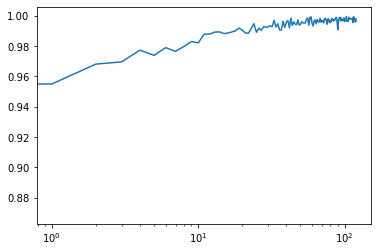

In [64]:
plt.semilogx( history.history["accuracy"])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش مقدار خطای مدل در طول آموزش مدل</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>

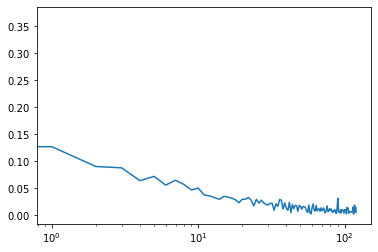

In [65]:
plt.semilogx( history.history["loss"])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش دقت و میزان خطای مدل آموزش داده شده در طول زمان به صورت همزمان</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>

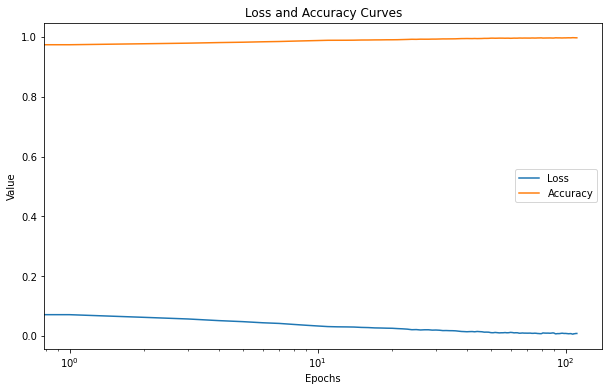

In [66]:
smoothed_loss = np.convolve(history.history['loss'], np.ones(10) / 10, mode='valid')
smoothed_accuracy = np.convolve(history.history['accuracy'], np.ones(10) / 10, mode='valid')

plt.figure(figsize=(10, 6))

plt.semilogx(smoothed_loss, label='Loss')
plt.semilogx(smoothed_accuracy, label='Accuracy')

plt.title('Loss and Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()




## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود checkpoint دخیره شده </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>

In [2]:
model = tf.keras.models.load_model(r"E:\projectDataset\Checkpoints\my_checkpoint_vgg16")


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی عملکرد مدل برای داده جدید</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma"></div>

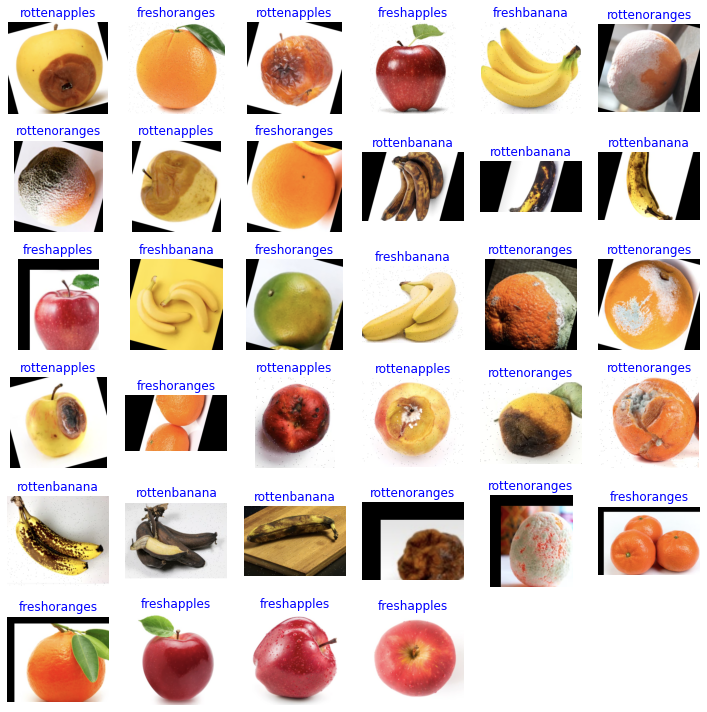

In [67]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


# Define class labels mapping
class_labels = {
    0: 'freshapples',
    1: 'freshbanana',
    2: 'freshoranges',
    3: 'rottenapples',
    4: 'rottenbanana',
    5: 'rottenoranges'
}

# Folder containing the images
folder_path = r"E:\projectDataset\tZoghi\db6\testFinal"

# Get the list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Prepare empty lists to store predictions and correctness
image_paths = []
predictions = []
correctness = []

# Iterate over the image files
for image_file in image_files:
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)

    # Preprocess the image
    input_size = (224, 224)
    image = image.resize(input_size)
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    # Pass the image through the model
    prediction = model.predict(image)

    # Interpret the prediction
    predicted_classes = np.argmax(prediction, axis=1)
    predicted_class_labels = [class_labels[class_index] for class_index in predicted_classes]

    # Determine correctness
    ground_truth_label = image_file.split('_')[0]
    correct = ground_truth_label == class_labels[predicted_classes[0]]

    # Append the image path, predicted classes, and correctness to the lists
    image_paths.append(image_path)
    predictions.append(predicted_class_labels)
    correctness.append(correct)

# Display the images, predicted classes, and correctness
num_images = len(image_paths)
rows = int(np.ceil(np.sqrt(num_images)))
cols = int(np.ceil(num_images / rows))

fig = plt.figure(figsize=(10, 10))

for i in range(num_images):
    # Load the image
    image = Image.open(image_paths[i])

    # Create a subplot
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow(image)
    ax.axis('off')

    # Set the title color based on correctness
    title_color = 'blue'
    ax.set_title(predictions[i][0], color=title_color)

plt.tight_layout()
plt.show()

